# **Waze Project**




Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>


Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the [PACE Strategy Document ](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).


# **Visualize a story in Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.



### **Task 1. Imports and data loading**

For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read in the data and store it as a dataframe object called df.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

# <img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?

**Answers:**

1. The data is already in a structured format. Each row represents a user.

2. Yes, 700 rows have `label` missing. Other variables have no missing values.

### **Task 2. Data exploration and cleaning**

Consider the following questions:



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







==> ENTER YOUR RESPONSES TO QUESTIONS 1-4 HERE
Answers:

SInce we are interested in user churn, the label column is essential. Besides label, variables that tie to user behaviors will be the most applicable. All variables tie to user behavior except ID.

ID can be dropped from the analysis since we are not interested in identifying a particular user. ID does not provide meaningful information about the churn (unless ID is assigned based on user sign-up time).

To check for missing data, we can use df.info() and inspect the Non-Null Count column. The difference between the number of non-nulls and the number of rows in the data is the number of missing values for the variable.

If the missing data are missing completely at random (MCAR), meaning that the reason for missingness is independent of the data values themselves, we can proceed with a complete-case analysis by removing the rows with missing values. Otherwise, we need to investigate the root cause of the missingness and make sure it won't interfere with the statistical inference and modeling.

See the previous exemplar responses for the outlier question.

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [11]:
#Check Null or Missing Values In The Dataset
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [4]:
df.shape

(14999, 13)

Generate summary statistics using the `describe()` method.

In [11]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

==> ENTER YOUR RESPONSES TO QUESTIONS 1-2 HERE

1) Use numpy functions to investigate the mean() and median() of the data and understand range of data values
   Use a boxplot to visualize the distribution of the data
   
2) There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make on a dataset-by-dataset basis, according to what your goals are for the model you are planning to construct. To help you make the decision, you can start with these general guidelines:

Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.

Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.

Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in   

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the Waze dataset.

**Question:** What type of data visualization(s) will be most helpful?

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map



==> ENTER YOUR RESPONSE HERE
Answer:

Box plots will be helpful to determine outliers and where the bulk of the data points reside in terms of drives, sessions and all other continuous numeric variables

Histograms are essential to understand the distribution of variables

Scatter plots will be helpful to visualize relationships between variables

Bar charts are useful for communicating levels and quantities, especially for categorical information

Begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

Text(0.5, 1.0, 'Sessions Box Plot')

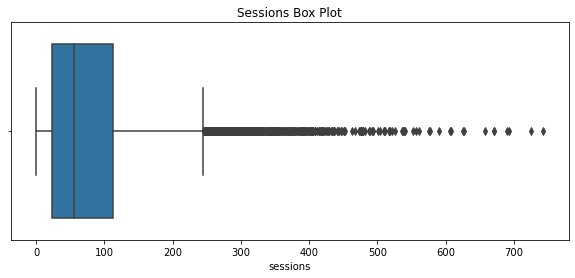

In [13]:
# Box plot
plt.figure(figsize=(10,4))
sns.boxplot(x= 'sessions',data =df)
plt.title('Sessions Box Plot')


Text(0.5, 1.0, 'Sessions Histogram')

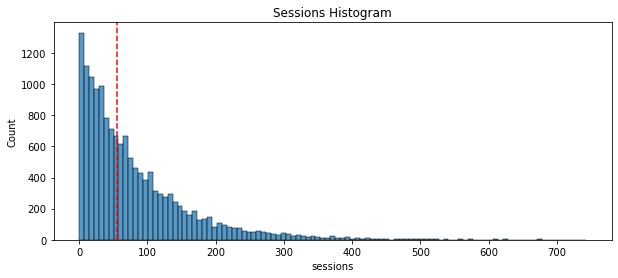

In [42]:
# Histogram
plt.figure(figsize=(10,4))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('Sessions Histogram')

In [14]:
df['sessions'].median()

56.0

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

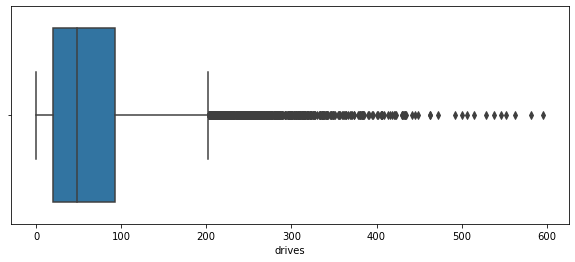

In [28]:
# Box plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df['drives'])


Text(0.5, 1.0, 'drives Histogram')

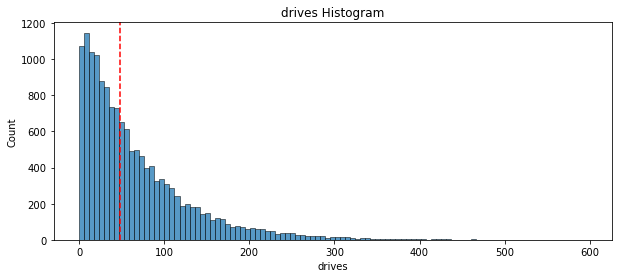

In [43]:
# Histogram
plt.figure(figsize=(10,4))
sns.histplot(x=df['drives'])
median = df['drives'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('drives Histogram')


In [13]:
df['drives'].median()

48.0

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

Text(0.5, 1.0, 'Total Sessions Box Plot')

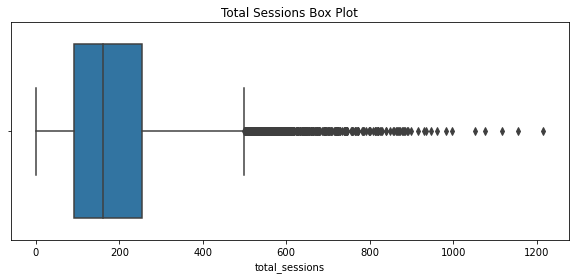

In [35]:
# Box plot
plt.figure(figsize=(10,4))
sns.boxplot(x=df['total_sessions'])
plt.title('Total Sessions Box Plot')


Text(0.5, 1.0, 'Total Sessions Histogram')

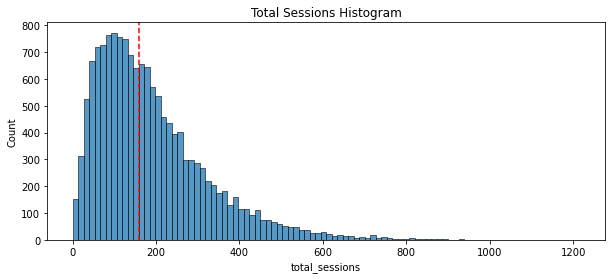

In [41]:
# Histogram
plt.figure(figsize=(10,4))
sns.histplot(x=df['total_sessions'])
median = df['total_sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title('Total Sessions Histogram')

In [15]:
df['total_sessions'].median()

159.5681147

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

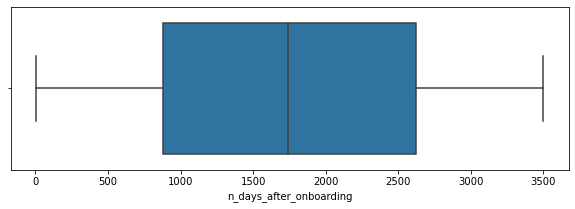

In [7]:
# Box plot
plt.figure(figsize=(10,3))
sns.boxplot(x=df['n_days_after_onboarding'])

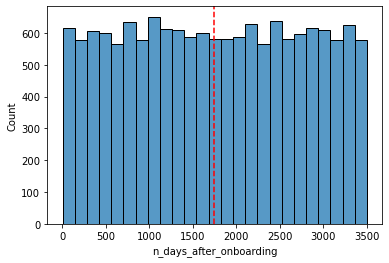

In [10]:
# Histogram
sns.histplot(x=df['n_days_after_onboarding'])
median=df['n_days_after_onboarding'].median()
plt.axvline(median,color='red',linestyle='--')

In [12]:
df['n_days_after_onboarding'].median()

1741.0

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

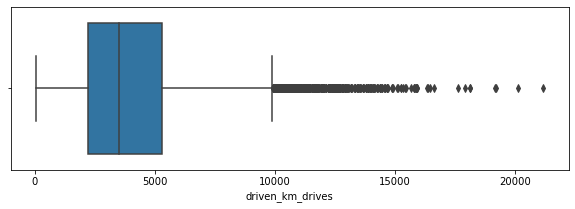

In [17]:
# Box plot
plt.figure(figsize=(10,3))
sns.boxplot(df['driven_km_drives'])

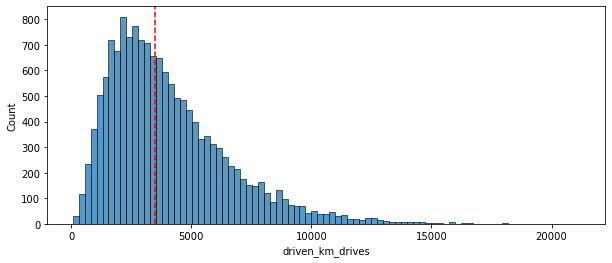

In [24]:
# Histogram
plt.figure(figsize=(10,4))
sns.histplot(df['driven_km_drives'])
median=df['driven_km_drives'].median()
plt.axvline(median,color='red',linestyle='--')

In [25]:
df['driven_km_drives'].median()

3493.858085

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

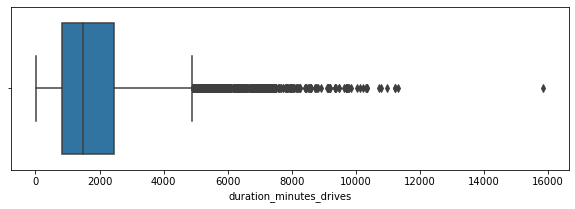

In [26]:
# Box plot
plt.figure(figsize=(10,3))
sns.boxplot(df['duration_minutes_drives'])

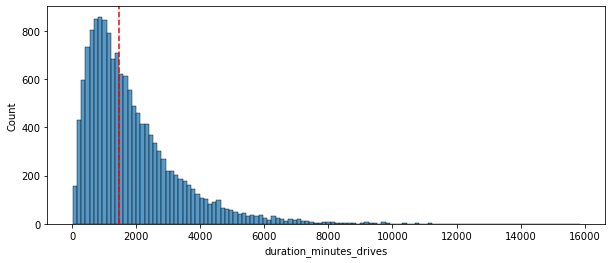

In [27]:
# Histogram
plt.figure(figsize=(10,4))
sns.histplot(df['duration_minutes_drives'])
median=df['duration_minutes_drives'].median()
plt.axvline(median,color='red',linestyle='--')

In [28]:
df['duration_minutes_drives'].median()

1478.249859

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

([<matplotlib.patches.Wedge at 0x7f43d0623950>,
 [Text(-0.48344574542824464, 0.9880689304027979, 'iPhone:9672'),
  Text(0.483445745428245, -0.9880689304027978, 'Android:5327')],
 [Text(-0.26369767932449706, 0.538946689310617, '64.5%'),
  Text(0.2636976793244972, -0.5389466893106168, '35.5%')])

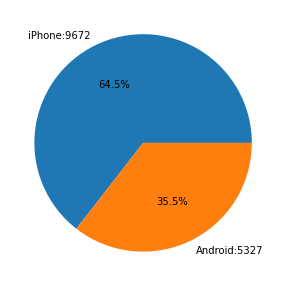

In [12]:
# Pie chart
plt.figure(figsize=(10,5))
data=df['device'].value_counts()
plt.pie(data,
               labels=[f'{data.index[0]}:{data.values[0]}', f'{data.index[1]}:{data.values[1]}'],autopct='%1.1f%%'
       
       )


There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

([<matplotlib.patches.Wedge at 0x7f43d0526790>,
 [Text(-0.9336262095053529, 0.5816718154807461, 'retained:11763'),
  Text(0.9336262367353746, -0.5816717717745484, 'churned:2536')],
 [Text(-0.5092506597301925, 0.31727553571677053, '82.3%'),
  Text(0.5092506745829316, -0.31727551187702635, '17.7%')])

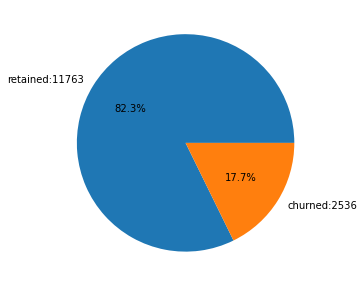

In [18]:
# Pie chart
plt.figure(figsize=(10,5))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}:{data.values[0]}',f'{data.index[1]}:{data.values[1]}'],autopct='%1.1f%%'
       
       )

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

Text(0, 0.5, 'count')

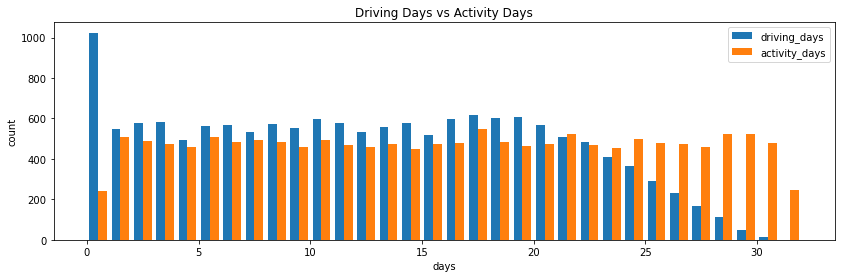

In [43]:
# Histogram
plt.figure(figsize=(14,4))
data=['driving_days','activity_days']
plt.hist([df['driving_days'], df['activity_days']],bins=range(0,33),label=data)
plt.legend()

plt.title('Driving Days vs Activity Days')
plt.xlabel('days')
plt.ylabel('count')


As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [49]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

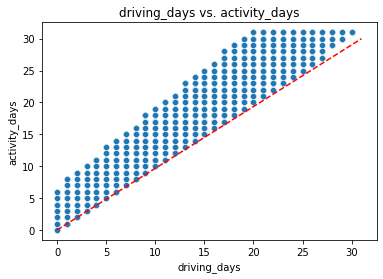

In [56]:
# Scatter plot
sns.scatterplot(x=df['driving_days'],y=df['activity_days'])
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,30], color='red', linestyle='--');

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

Text(0.5, 1.0, 'Retention By Device ')

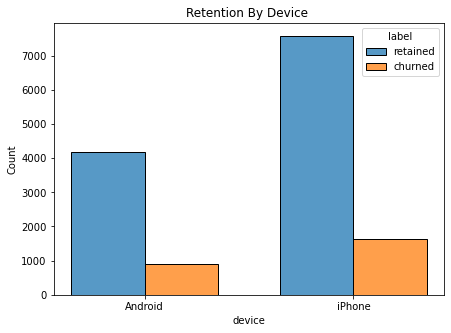

In [32]:
# Histogram
plt.figure(figsize=(7,5))
sns.histplot(x='device',data=df,hue='label',multiple='dodge',shrink=0.7)
plt.title('Retention By Device ')

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [12]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day']= df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [39]:
#Confirm new column
df.head(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667


What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [13]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day']=0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

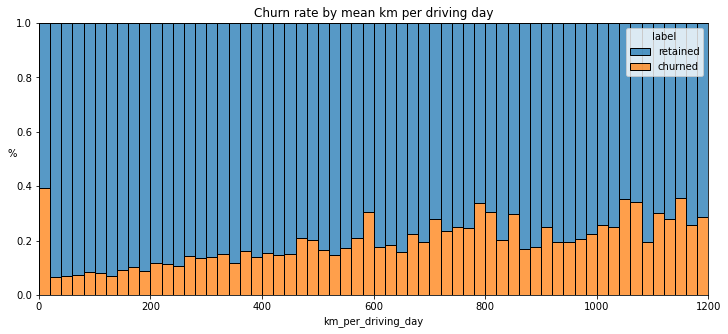

In [28]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

Text(0.5, 1.0, 'Churn Rate Per Driving Day')

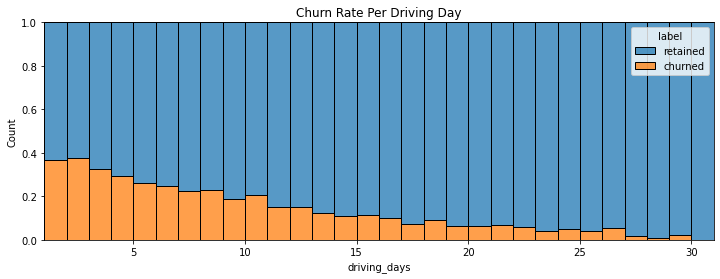

In [48]:
# Histogram
plt.figure(figsize=(12,4))
sns.histplot(data=df,x='driving_days',hue='label',multiple='fill',bins=range(1,32))
plt.title('Churn Rate Per Driving Day')

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [41]:
df['percent_sessions_in_last_month']= df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [42]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Now, create a histogram depicting the distribution of values in this new column.

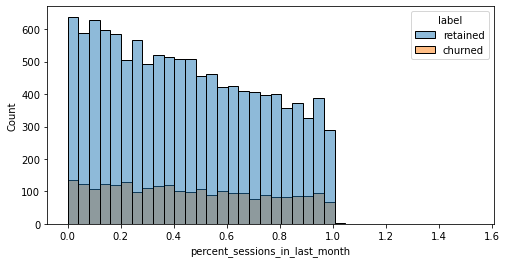

In [55]:
# Histogram
plt.figure(figsize=(8,4))
sns.histplot(x='percent_sessions_in_last_month',data=df,hue='label')

Check the median value of the `n_days_after_onboarding` variable.

In [56]:
df['n_days_after_onboarding'].median()

1741.0

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [7]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [8]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999999


Call `describe()` to see if your change worked.

In [9]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?





==> ENTER YOUR RESPONSE HERE

I have learned ....
There is missing data in the user churn label, so we might need further data processing before further analysis.
There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
On average, retained users have fewer drives than churned users

My other questions are ....
How does the missingness in the user churn label arise?
Who are the users with an extremely large number of drives? Are they ridesharing drivers or commercial drivers?
Why do retained users have fewer drives than churned users? Is it because churned users have a longer history of using the Waze app?
What is the user demographic for retained users and churned users?

My client would likely want to know ...
What are the key variables associated with user churn?
Can we implement policies to reduce user churn?


